In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from icosphere_py.shapes import RegIcos

#### Create the base regular icosahedron. Vertices in Cartesian coords are stored in a dataframe in `.vertices`

In [2]:
icos = RegIcos(100)
icos.vertices

,x,y,z,origicos
0,-52.573111,85.065081,0.000000,True
1,52.573111,85.065081,0.000000,True
2,-52.573111,-85.065081,0.000000,True
3,52.573111,-85.065081,0.000000,True
4,0.000000,-52.573111,85.065081,True
5,0.000000,52.573111,85.065081,True
6,0.000000,-52.573111,-85.065081,True
7,0.000000,52.573111,-85.065081,True
8,85.065081,0.000000,-52.573111,True
9,85.065081,0.000000,52.573111,True


#### Create derived "icospheres" by repeated subdivision

My code is very slow so even only 3 iterations takes a while...

In [3]:
%time poly2 = icos.subdivide()
%time poly3 = poly2.subdivide()
%time poly4 = poly3.subdivide()

CPU times: user 1.36 s, sys: 35.1 ms, total: 1.4 s
Wall time: 1.36 s
CPU times: user 7.48 s, sys: 35.8 ms, total: 7.51 s
Wall time: 7.47 s
CPU times: user 1min 6s, sys: 137 ms, total: 1min 6s
Wall time: 1min 6s


#### Plot them by drawing their edges

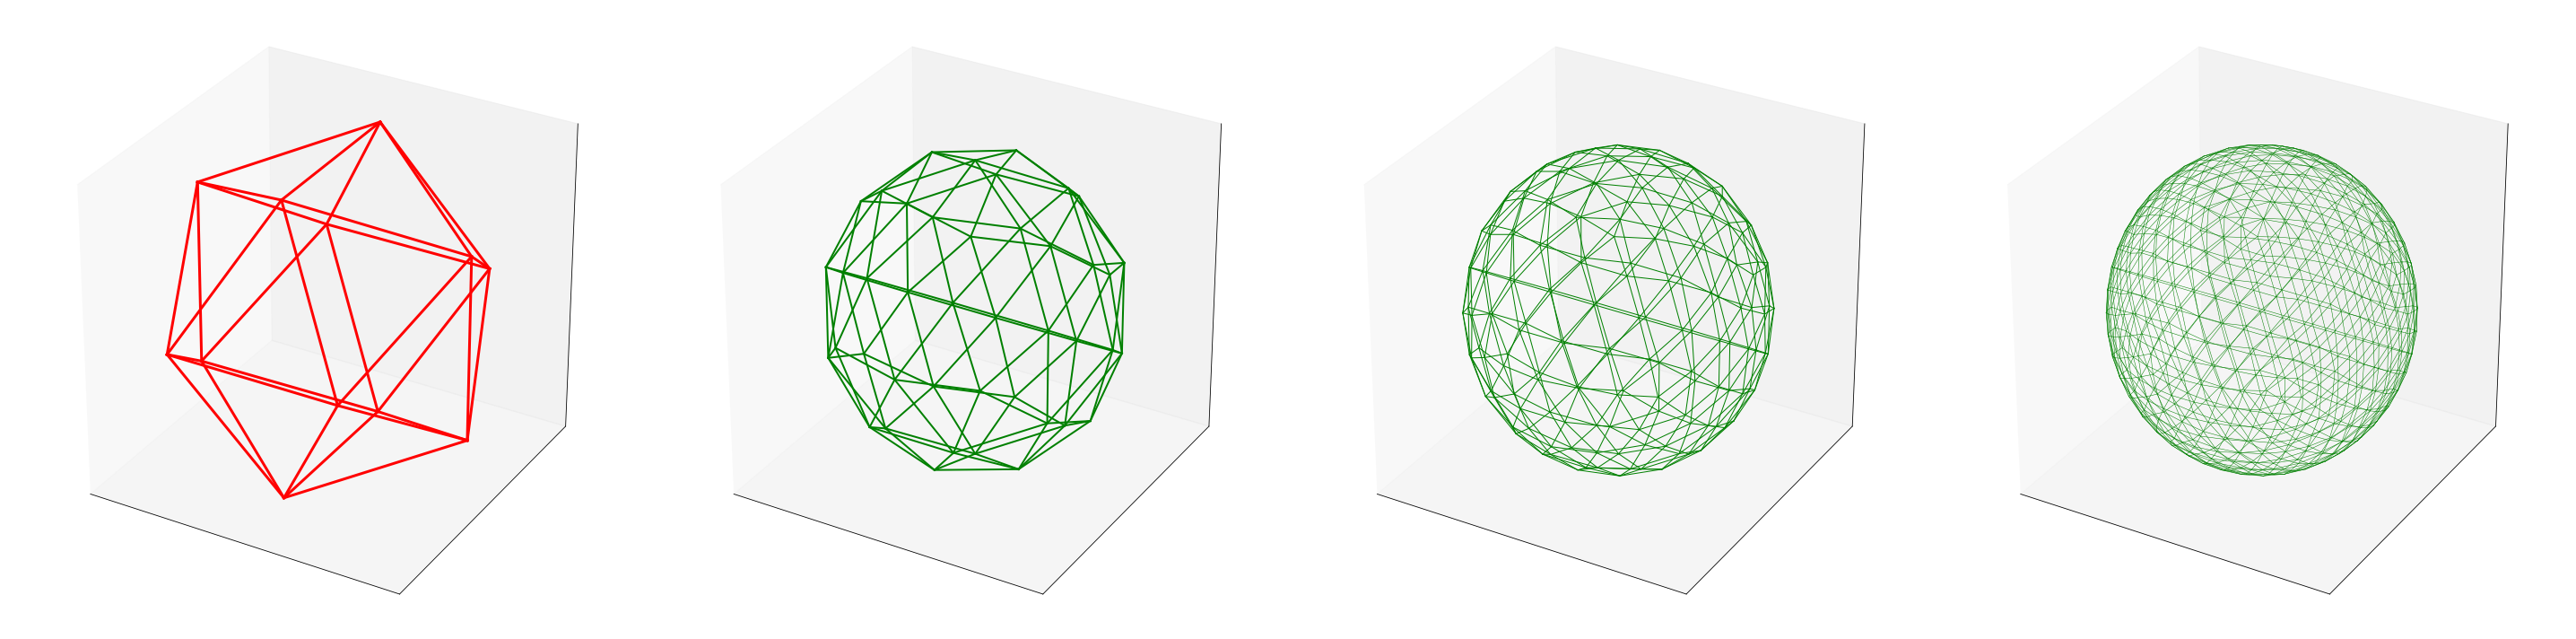

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def noaxticks(ax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(141, projection='3d'); noaxticks(ax)
icos.drawedges(ax,'r',3)

ax = fig.add_subplot(142, projection='3d'); noaxticks(ax)
poly2.drawedges(ax,'g',2)

ax = fig.add_subplot(143, projection='3d'); noaxticks(ax)
poly3.drawedges(ax,'g',1)

ax = fig.add_subplot(144, projection='3d'); noaxticks(ax)
poly4.drawedges(ax,'g',0.5)

fig.tight_layout()